# API WeatherPy
### Joey Ashcroft

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: "Duh. It gets hotter..."

But, if pressed, how would you prove it?

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate List of Cities

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
counter=0
set_counter=1
counter_finish=0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    counter_finish=counter_finish+1
    
    if (counter==0)&(set_counter==1):
        print("Beginning Data Retrieval")
        print("-----------------------------")
    
    if (counter==49):
        counter=0
        set_counter=set_counter+1
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        city_name.append(city)
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {counter} of set {set_counter} | {city}")
        counter=counter+1
    except KeyError:
        print("City not found. Skipping...")
    
    if (counter_finish==len(cities)):
        print("-----------------------------")
        print("Data Retrieval Complete")
        print("-----------------------------")
        

Beginning Data Retrieval
-----------------------------
Processing Record 0 of set 1 | cayenne
Processing Record 1 of set 1 | hermanus
Processing Record 2 of set 1 | kaitangata
Processing Record 3 of set 1 | manta
Processing Record 4 of set 1 | atuona
Processing Record 5 of set 1 | severo-kurilsk
Processing Record 6 of set 1 | tuatapere
Processing Record 7 of set 1 | mataura
Processing Record 8 of set 1 | port alfred
Processing Record 9 of set 1 | albany
Processing Record 10 of set 1 | moose factory
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of set 1 | nadadores
Processing Record 12 of set 1 | saint-augustin
Processing Record 13 of set 1 | salalah
Processing Record 14 of set 1 | cape town
Processing Record 15 of set 1 | rikitea
Processing Record 16 of set 1 | butaritari
Processing Record 17 of set 1 | atbasar
Processing Record 18 of set 1 | cabo san lucas
Processing Record 19 of set 1 | viedma
Processing Record 20 of set 1 | tuktoyaktuk
Processing Recor

Processing Record 38 of set 4 | avarua
Processing Record 39 of set 4 | primorsko-akhtarsk
Processing Record 40 of set 4 | kavaratti
Processing Record 41 of set 4 | arraial do cabo
Processing Record 42 of set 4 | luena
Processing Record 43 of set 4 | east london
Processing Record 44 of set 4 | saint george
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of set 4 | sept-iles
Processing Record 46 of set 4 | bubaque
Processing Record 47 of set 4 | west richland
Processing Record 48 of set 4 | poum
Processing Record 0 of set 5 | zyryanka
City not found. Skipping...
Processing Record 1 of set 5 | victor harbor
Processing Record 2 of set 5 | noyabrsk
Processing Record 3 of set 5 | muros
Processing Record 4 of set 5 | pisco
Processing Record 5 of set 5 | lasa
Processing Record 6 of set 5 | ekhabi
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of set 5 | kavieng
Processing Record 8 of set 5 | lithgow
Processin

Processing Record 28 of set 8 | bashmakovo
Processing Record 29 of set 8 | berceni
Processing Record 30 of set 8 | lokomotivnyy
Processing Record 31 of set 8 | moron
Processing Record 32 of set 8 | port-gentil
Processing Record 33 of set 8 | tacuarembo
Processing Record 34 of set 8 | velikiy ustyug
Processing Record 35 of set 8 | komsomolskiy
Processing Record 36 of set 8 | xinye
Processing Record 37 of set 8 | flinders
City not found. Skipping...
Processing Record 38 of set 8 | mehkar
Processing Record 39 of set 8 | along
Processing Record 40 of set 8 | taree
Processing Record 41 of set 8 | starokostyantyniv
Processing Record 42 of set 8 | mersing
Processing Record 43 of set 8 | san patricio
Processing Record 44 of set 8 | nizhyn
Processing Record 45 of set 8 | belawan
Processing Record 46 of set 8 | nizhnyaya omka
Processing Record 47 of set 8 | boone
Processing Record 48 of set 8 | jumla
Processing Record 0 of set 9 | kurilsk
Processing Record 1 of set 9 | clyde river
Processing Rec

Processing Record 14 of set 12 | santa cruz de la palma
Processing Record 15 of set 12 | la asuncion
Processing Record 16 of set 12 | naze
Processing Record 17 of set 12 | lufkin
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [10]:
summary_df = pd.DataFrame({
    "City":city_name,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed,
})

summary_df.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [21]:
#export to csv
summary_df.to_csv("summary_data.csv", index=False)

#display the data frame
summary_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cayenne,80,GF,1551420000,83,4.94,-52.33,75.20,7.43
1,hermanus,88,ZA,1551420075,97,-34.42,19.24,64.99,1.01
2,kaitangata,0,NZ,1551420600,65,-46.28,169.85,59.80,20.07
3,manta,0,RO,1551420318,72,45.10,24.10,35.01,5.97
4,atuona,8,PF,1551420601,100,-9.80,-139.03,81.08,9.44


### Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

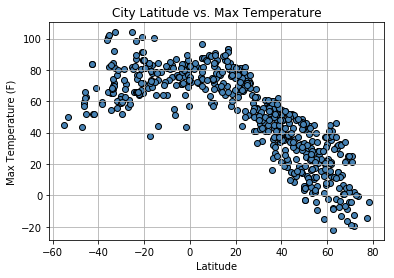

In [14]:
plt.scatter(summary_df['Lat'], summary_df['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black")
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save the Figure
plt.savefig("Images/latitude_temperature.png")

#show image
plt.show()

#### Latitude vs. Humidity Plot

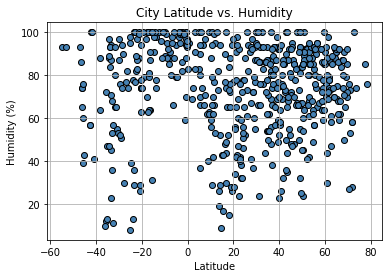

In [15]:
plt.scatter(summary_df['Lat'], summary_df['Humidity'], marker="o", facecolors="steelblue", edgecolors="black")
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the Figure
plt.savefig("Images/latitude_humidity.png")

#show image
plt.show()

#### Latitude vs. Cloudiness Plot

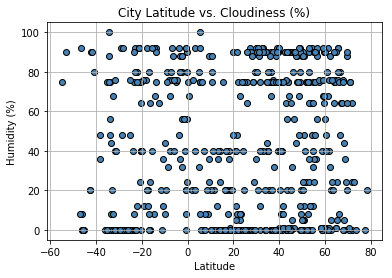

In [16]:
plt.scatter(summary_df['Lat'], summary_df['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black")
plt.grid()
plt.title('City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the Figure
plt.savefig("Images/latitude_cloudiness.png")

#show image
plt.show()

#### Latitude vs. Wind Speed Plot

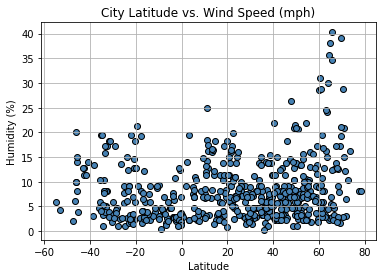

In [18]:
plt.scatter(summary_df['Lat'], summary_df['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black")
plt.grid()
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the Figure
plt.savefig("Images/latitude_windspeed.png")

#show image
plt.show()